In [100]:
#Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt # for plotting graphs
from sklearn.preprocessing import MinMaxScaler #for scaling data
from sklearn.cluster import KMeans # for clustering by using KMeans algoritm 

In [101]:
#loading dataset
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/ACM-Research/Coding-Challenge/master/ClusterPlot.csv")
data

,Unnamed: 0,V1,V2
0,0,4.30,0.80
1,1,3.95,0.80
2,2,3.95,0.75
3,3,3.85,0.85
4,4,4.30,0.80
...,...,...,...
145,145,4.85,3.75
146,146,4.40,3.45
147,147,4.75,3.60
148,148,4.80,3.85


In [102]:
data.describe()

,Unnamed: 0,V1,V2
count,150.000000,150.000000,150.000000
mean,74.500000,4.448667,2.478667
std,43.445368,0.445859,1.253831
min,0.000000,3.400000,0.600000
25%,37.250000,4.150000,0.900000
50%,74.500000,4.425000,2.825000
75%,111.750000,4.787500,3.500000
max,149.000000,5.850000,4.600000


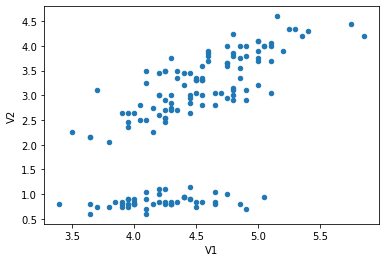

In [103]:
data.plot(kind='scatter',x='V1',y='V2')
plt.show()

In [104]:
#Drop Unnamed: 0, we don't use this column
df = data.drop(['Unnamed: 0'], axis = 1)

In [105]:
df

,V1,V2
0,4.30,0.80
1,3.95,0.80
2,3.95,0.75
3,3.85,0.85
4,4.30,0.80
...,...,...
145,4.85,3.75
146,4.40,3.45
147,4.75,3.60
148,4.80,3.85


In [106]:
#Scaling the dataset
mms=MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

In [107]:
data_transformed

array([[0.36734694, 0.05      ],
       [0.2244898 , 0.05      ],
       [0.2244898 , 0.0375    ],
       [0.18367347, 0.0625    ],
       [0.36734694, 0.05      ],
       [0.51020408, 0.1125    ],
       [0.24489796, 0.0625    ],
       [0.32653061, 0.0625    ],
       [0.10204082, 0.05      ],
       [0.24489796, 0.05      ],
       [0.46938776, 0.0625    ],
       [0.28571429, 0.075     ],
       [0.20408163, 0.0375    ],
       [0.10204082, 0.        ],
       [0.6122449 , 0.025     ],
       [0.67346939, 0.0875    ],
       [0.51020408, 0.0625    ],
       [0.36734694, 0.0625    ],
       [0.55102041, 0.1       ],
       [0.42857143, 0.075     ],
       [0.40816327, 0.0875    ],
       [0.40816327, 0.0875    ],
       [0.28571429, 0.        ],
       [0.32653061, 0.125     ],
       [0.28571429, 0.1125    ],
       [0.24489796, 0.075     ],
       [0.32653061, 0.1       ],
       [0.3877551 , 0.0625    ],
       [0.36734694, 0.05      ],
       [0.2244898 , 0.075     ],
       [0.

In [108]:
#Convert to Dataframe
data_transformed = pd.DataFrame(data_transformed, columns=['V1','V2'])
data_transformed

,V1,V2
0,0.367347,0.0500
1,0.224490,0.0500
2,0.224490,0.0375
3,0.183673,0.0625
4,0.367347,0.0500
...,...,...
145,0.591837,0.7875
146,0.408163,0.7125
147,0.551020,0.7500
148,0.571429,0.8125


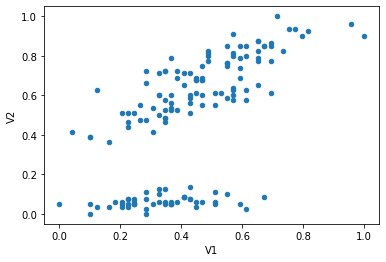

In [109]:
#Replotting dataset after scaling
data_transformed.plot(kind='scatter', x='V1',y='V2')
plt.show()

In [110]:
#Elbow method to minimize WSS (Within-cluster Sum of Square)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

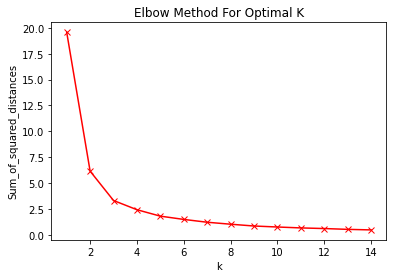

In [111]:
#Plotting the Elbow Curve by k (number of clusters)
plt.plot(K, Sum_of_squared_distances, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()


In [112]:
#In the Elbow Method for Optimal K plot above the elbow is at k=3 indicating that the optimal k for the dataset is 3 

In [113]:
#Using KMean with k=3 to cluster for the dataset
data=pd.read_csv('https://raw.githubusercontent.com/ACM-Research/Coding-Challenge/master/ClusterPlot.csv')
df=data.drop(['Unnamed: 0'],axis=1)

In [114]:
#clustering the dataset with k=3
km3 = KMeans(n_clusters=3)
km3 = km3.fit(df)

In [115]:
print(km3.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [116]:
#how many observations are in each cluster
print(km3.labels_)
result=km3.labels_
result=pd.DataFrame(result,columns=['cluster'])
result.groupby('cluster').size()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


cluster
0    50
1    38
2    62
dtype: int64

In [117]:
#The centroid of cluster 
centroids = km3.cluster_centers_
centroids=pd.DataFrame(centroids, columns=['Centroid_V1','Centroid_V2'])
centroids

,Centroid_V1,Centroid_V2
0,4.212000,0.854000
1,4.960526,3.913158
2,4.325806,2.909677


In [118]:
#Predict clusters for 3 data points with with V1 and V2 as below 
clu_pred=km3.predict([[18,3700],[4,900],[10,1700]])

In [119]:
#show the results
clu_pred

array([1, 1, 1])

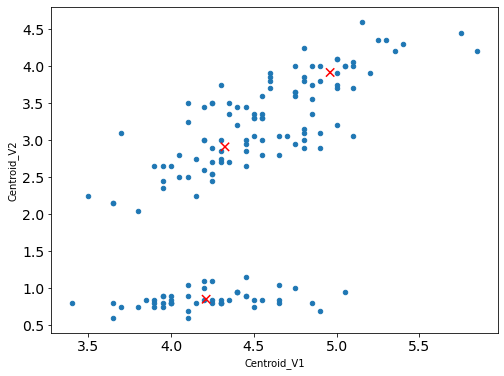

In [120]:
#Draw the centroid of Cluster
s1= data.plot(figsize=[8,6], kind='scatter', x='V1',y='V2')
centroids.plot(ax=s1, kind='scatter',x='Centroid_V1',y='Centroid_V2', color='red',fontsize=14,marker='x',s=[70,70,70])
plt.show()